## Machine Leaning 실습

### Classification With Python

In [1]:
# 1. package 가져오기
import numpy as np
import pandas as pd

In [2]:
# 2. 데이터 프레임
df = pd.read_csv('./02Social_Network_Ads.csv')

In [3]:
# 3. 데이터 살펴보기
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15566689,Female,35.0,57000.0,0
1,15569641,Female,58.0,95000.0,1
2,15570769,Female,26.0,80000.0,0
3,15570932,Male,34.0,115000.0,0
4,15571059,Female,33.0,41000.0,0


In [4]:
# UserID는 의미가 없다.
df.describe(include = 'all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,394,390.000000,388.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,202,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.782051,69628.865979,0.357500
std,7.165832e+04,NaN,10.452300,33889.337949,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,30.000000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,87250.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           394 non-null    object 
 2   Age              390 non-null    float64
 3   EstimatedSalary  388 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [6]:
df.drop('User ID', axis = 1, inplace = True)

In [7]:
# 4. feature/label 분리
feature = df.iloc[:, :-1]
label = df.iloc[:, -1]

print(feature)
print(label)

     Gender   Age  EstimatedSalary
0    Female  35.0          57000.0
1    Female  58.0          95000.0
2    Female  26.0          80000.0
3      Male  34.0         115000.0
4    Female  33.0          41000.0
..      ...   ...              ...
395    Male  40.0         107000.0
396    Male  27.0          20000.0
397    Male  57.0          60000.0
398    Male  31.0          66000.0
399  Female  45.0         131000.0

[400 rows x 3 columns]
0      0
1      1
2      0
3      0
4      0
      ..
395    1
396    0
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [8]:
# 5. 빠진 값 확인 
feature.isnull().sum()

Gender              6
Age                10
EstimatedSalary    12
dtype: int64

In [9]:
# 6. Clean Missing Data 1 - numeric
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer()
mean_imputer = SimpleImputer(strategy = 'mean')
feature.iloc[:, 1:] = mean_imputer.fit_transform(feature.iloc[:, 1:])
feature.isnull().sum()

Gender             6
Age                0
EstimatedSalary    0
dtype: int64

In [10]:
# 6. Clean Missing Data 2 - string
# imputer의 input 형태는 데이터 프레임 형태여야한다
# 시리즈일 경우 에러발생
# 커럼 한개만 하더라도 슬라이싱을 해줘야 한다
from sklearn.impute import SimpleImputer

frequent_impute = SimpleImputer(strategy='most_frequent')
frequent_impute.fit(feature.iloc[:,:1])
feature['Gender'] = frequent_impute.fit_transform(feature.iloc[:,:1])
feature.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
dtype: int64

In [11]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.5+ KB


In [12]:
print(feature)

     Gender   Age  EstimatedSalary
0    Female  35.0          57000.0
1    Female  58.0          95000.0
2    Female  26.0          80000.0
3      Male  34.0         115000.0
4    Female  33.0          41000.0
..      ...   ...              ...
395    Male  40.0         107000.0
396    Male  27.0          20000.0
397    Male  57.0          60000.0
398    Male  31.0          66000.0
399  Female  45.0         131000.0

[400 rows x 3 columns]


In [13]:
# 7. One hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# []안에는 행을 적어주는데 원하는 행을 적어준다. 여러개를 진행할 때에는 [3, 6, 9] 이런식으로 진행이 가능하다.
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [0])], 
                      remainder ='passthrough')

feature = ct.fit_transform(feature)
print(feature)

[[1.00e+00 0.00e+00 3.50e+01 5.70e+04]
 [1.00e+00 0.00e+00 5.80e+01 9.50e+04]
 [1.00e+00 0.00e+00 2.60e+01 8.00e+04]
 ...
 [0.00e+00 1.00e+00 5.70e+01 6.00e+04]
 [0.00e+00 1.00e+00 3.10e+01 6.60e+04]
 [1.00e+00 0.00e+00 4.50e+01 1.31e+05]]


In [14]:
# 8. split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2, random_state = 10)
print(X_train)
print(y_train)

[[1.0000000e+00 0.0000000e+00 4.9000000e+01 6.9628866e+04]
 [1.0000000e+00 0.0000000e+00 3.3000000e+01 1.1300000e+05]
 [1.0000000e+00 0.0000000e+00 2.8000000e+01 8.7000000e+04]
 ...
 [0.0000000e+00 1.0000000e+00 4.1000000e+01 8.7000000e+04]
 [0.0000000e+00 1.0000000e+00 4.5000000e+01 2.2000000e+04]
 [0.0000000e+00 1.0000000e+00 4.7000000e+01 1.0500000e+05]]
303    1
349    0
149    0
100    0
175    1
      ..
369    0
320    0
15     1
125    1
265    1
Name: Purchased, Length: 320, dtype: int64


In [15]:
# 9. train
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [17]:
# 10. Score
y_pred_dt = dt_clf.predict(X_test)
print(y_pred_dt)

[0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0
 1 1 0 0 0 0]


In [18]:
# 10. Score
y_pred_lr = lr_clf.predict(X_test)
print(y_pred_lr)

[0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0
 1 0 0 0 0 0]


In [19]:
# 11. Evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def get_eval(y_pred, y_test):
    confusion  = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(accuracy)
    print(confusion)
    print(precision)
    print(recall)

get_eval(y_pred_dt, y_test)
get_eval(y_pred_lr, y_test)

0.825
[[40 10]
 [ 4 26]]
0.7222222222222222
0.8666666666666667
0.825
[[42  8]
 [ 6 24]]
0.75
0.8


In [20]:
! pip install seaborn

<AxesSubplot:>

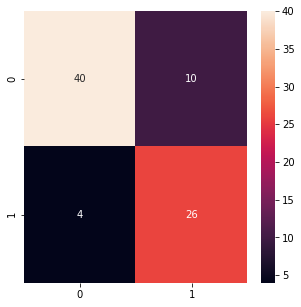

In [21]:
# 12. CM Visualize DeicsionTree
import matplotlib.pyplot as plt
import seaborn as sns

cm  = confusion_matrix(y_test,y_pred_dt)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)

<AxesSubplot:>

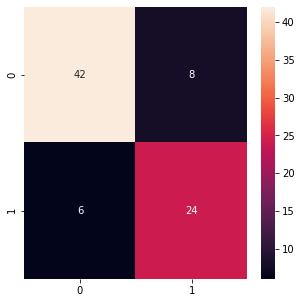

In [22]:
# 12. CM Visualize LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

cm  = confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)